In [31]:
# `pandas` to read in our data
import pandas as pd

# `seaborn` for built-in themes and chart types
import seaborn as sns

# `matplotlib` for customizing visual details
import matplotlib.pyplot as plt
%matplotlib inline
 
# `statistics` easily calculating statistical measures
import statistics


In [32]:
# # UNCOMMENT BELOW TO USE WITH GOOGLE COLAB
# # Import PyDrive and associated libraries.
# # This only needs to be done once per notebook.
# # Documentation found here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [33]:
# # UNCOMMENT BELOW TO USE WITH GOOGLE COLAB
# # Link to data file stored in Drive: https://drive.google.com/file/d/1gyWJhIbMNnDlI1SCyLl_pZkxkIcdAhd4/view?usp=sharing
# file_id = '1gyWJhIbMNnDlI1SCyLl_pZkxkIcdAhd4' # notice where this string comes from in link above

# imported_file = drive.CreateFile({'id': file_id}) # creating an accessible copy of the shared data file
# print(imported_file['title'])  # it should print the title of desired file
# imported_file.GetContentFile(imported_file['title']) # refer to it in this notebook by the same name as it has in Drive

In [34]:
# read in our data
wing_data = pd.read_csv('../datasets/wing_length - s057.csv')

# set a basic color theme for our visualization
sns.set_theme(style="white")

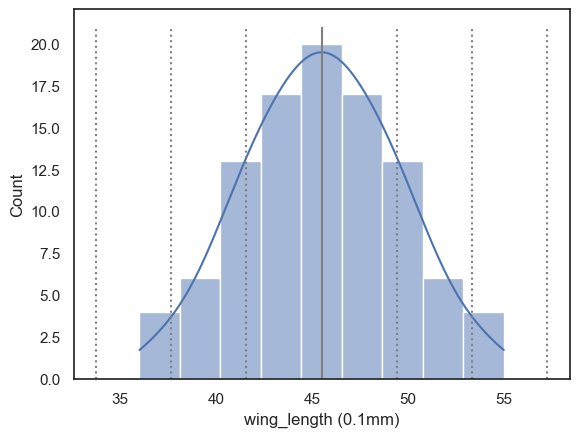

In [35]:
# create the histogram, allowing `seaborn` to choose default "bin" values
wing_plot = sns.histplot(data=wing_data, x="wing_length (0.1mm)", kde="True")

# calculate the standard deviation via the `statistics` `stdev()` method
sd = statistics.stdev(wing_data['wing_length (0.1mm)'])

# get the min and max y-values on our histogram
y_axis_range = wing_plot.get_ylim()

# plot the mean as a solid line
mean = wing_data['wing_length (0.1mm)'].mean()
wing_plot.vlines(mean, 0, y_axis_range[1], color='gray', ls='-')

# plot the three standard deviation boundary lines on either side of the mean
for i in range(-3,4):

    # find the current boundary value
    z_value = mean + (i*sd)

    # don't draw a second line over the mean line
    if z_value != mean:

        # plot a dotted gray line at each boundary value
        wing_plot.vlines(z_value, 0, y_axis_range[1], color='gray', ls=':')

# show the plot!
plt.show()